<a href="https://colab.research.google.com/github/Krishal555/Concepts-of-AI-Workshop0/blob/main/Worksheet_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Krishal Maharjan**
# Worksheet - 3


#To - Do - Task
#3.1 Warming Up Exercises - Basic Inspection and Exploration:
#Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/bank .csv')

# Step 2: Check the DataFrame's info
print(df.info())

# Step 3: Identify columns with dtype = object
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype='object':")
print(object_columns)

# Step 4: Check for unique values in those columns
for col in object_columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())

# Step 5: Check for null values in each column
print("\nNull values per column:")
print(df.isnull().sum())

# Step 6: Drop the object columns
df_numeric = df.drop(columns=object_columns)

# Step 7: Save the new DataFrame to a CSV file
df_numeric.to_csv('banknumericdata.csv', index=False)

# Step 8: Read the new CSV file and compute summary statistics
df_numeric = pd.read_csv('banknumericdata.csv')
print("\nSummary Statistics of the numeric data:")
df_numeric.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Columns with dtype='object':
Index(['job', 'marital', 'education', 'default', 'housing', 'loan

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Problem 2 - Data Imputations:
#Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/medical_students_dataset.csv')

# Step 2: Check the DataFrame's info
print(df.info())

# Step 3: Identify columns with missing values
missing_values = df.isnull().sum()
print("\nColumns with missing values:")
print(missing_values)

# Step 4: Impute missing values
# Example techniques for imputation:
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Check if the column has missing values
        print(f"\nImputing missing values for column: {column}")

        # For numeric columns: use mean or median imputation
        if df[column].dtype in ['float64', 'int64']:
            # If the column is numeric, we use the median (more robust to outliers)
            df[column].fillna(df[column].median(), inplace=True)
            print(f"Imputed missing values in numeric column '{column}' using median.")

        # For categorical columns: use mode imputation
        elif df[column].dtype == 'object':
            # If the column is categorical, we use the mode (most frequent value)
            df[column].fillna(df[column].mode()[0], inplace=True)
            print(f"Imputed missing values in categorical column '{column}' using mode.")

# Step 5: Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Step 6: Remove duplicate rows if present
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.")

# Step 7: Save the cleaned dataset
df.to_csv('medical_student_cleaned.csv', index=False)
print("\nCleaned dataset saved to 'medical_student_cleaned.csv'.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight         

<ipython-input-9-be13fdd3b504>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-9-be13fdd3b504>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


Imputing missing values for column: Smoking
Imputed missing values in categorical column 'Smoking' using mode.

Number of duplicate rows: 12879
Removed 12879 duplicate rows.

Cleaned dataset saved to 'medical_student_cleaned.csv'.


#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
#Dataset Used: "titanic.csv"
#Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/Titanic-Dataset.csv')

# Step 2: Subset the DataFrame for the required columns
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Step 3: Filter rows where 'Pclass' is 1 (first-class passengers)
df_first_class = df_subset[df_subset['Pclass'] == 1]

# Step 4: Calculate the mean, median, max, and min of the 'Fare' column
mean_fare = df_first_class['Fare'].mean()
median_fare = df_first_class['Fare'].median()
max_fare = df_first_class['Fare'].max()
min_fare = df_first_class['Fare'].min()

# Step 5: Print the results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


#Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
import pandas as pd

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/Titanic-Dataset.csv')

# Step 2: Subset the DataFrame for the required columns
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Step 3: Filter rows where 'Pclass' is 1 (first-class passengers)
df_first_class = df_subset[df_subset['Pclass'] == 1]

# Step 4: Check for null values in the 'Age' column
null_age_count = df_first_class['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")

# Step 5: Drop rows where 'Age' is null
df_first_class_cleaned = df_first_class.dropna(subset=['Age'])

# Step 6: Verify that the null values are dropped
null_age_after_drop = df_first_class_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_age_after_drop}")


Number of null values in 'Age' column: 30
Number of null values in 'Age' column after dropping: 0


#Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
#Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
import pandas as pd

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/Titanic-Dataset.csv')

# Step 2: Apply one-hot encoding to the 'Embarked' column
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Step 3: Add the new columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Step 4: Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# Step 5: Print the first few rows of the modified DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


#Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-17-b8c3b4fa2d67>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Survived', data=df, palette='Set2')


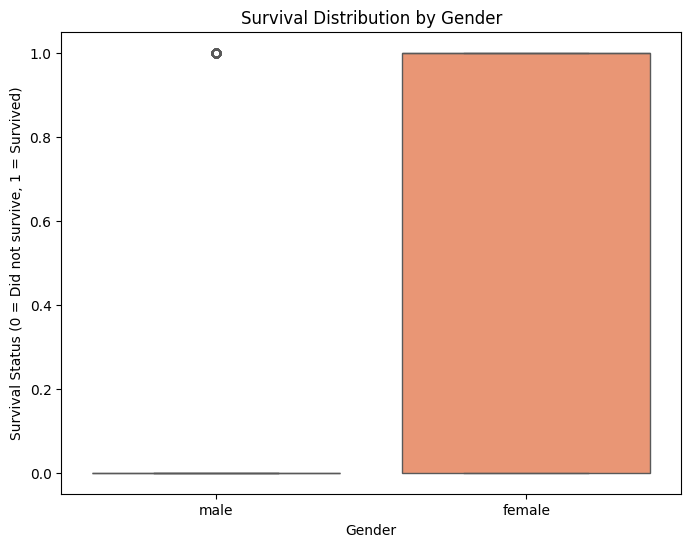

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/Titanic-Dataset.csv')

# Step 2: Calculate the mean survival rate for each gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_gender)

# Step 3: Create a visualization to show how survival distributions vary by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Survived', data=df, palette='Set2')
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Status (0 = Did not survive, 1 = Survived)')
plt.show()


#Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

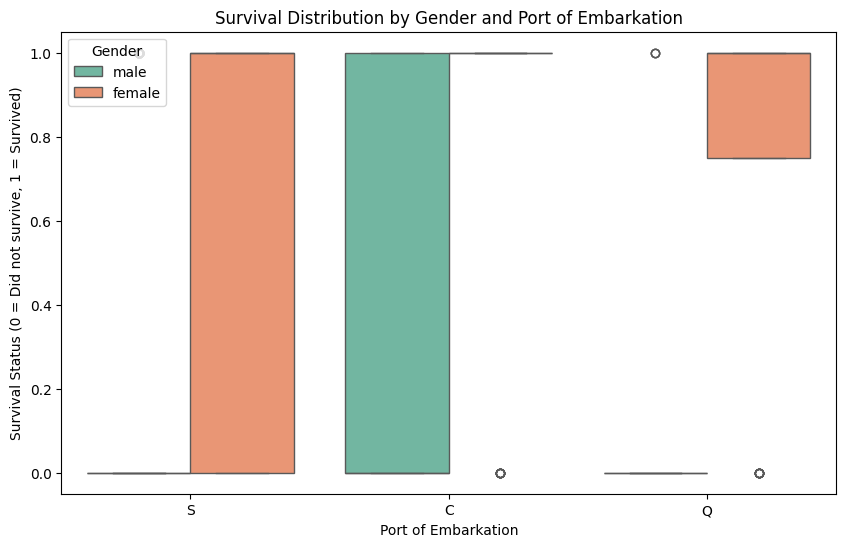

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/Titanic-Dataset.csv')

# Step 2: Create a visualization to show survival distributions by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Survived', hue='Sex', data=df, palette='Set2')

# Step 3: Customize the plot
plt.title('Survival Distribution by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Status (0 = Did not survive, 1 = Survived)')
plt.legend(title='Gender', loc='upper left')

# Step 4: Show the plot
plt.show()


#Problem - 6 {Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-21-4a66e71688b2>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival = df.groupby(['Pclass', 'Age_group'])['Survived'].mean().reset_index()


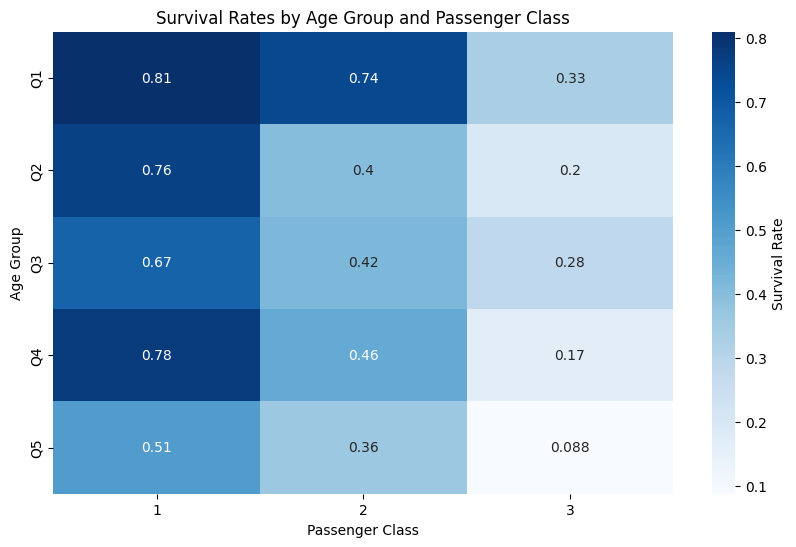

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/drive-download-20241201T085432Z-001/Titanic-Dataset.csv')

# Step 2: Divide 'Age' into 5 quantiles
df['Age_group'] = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Step 3: Calculate the mean survival rate by passenger class and age group
mean_survival = df.groupby(['Pclass', 'Age_group'])['Survived'].mean().reset_index()

# Step 4: Pivot the data for visualization
mean_survival_pivot = mean_survival.pivot(index='Age_group', columns='Pclass', values='Survived')

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(mean_survival_pivot, annot=True, cmap='Blues', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age Group')
plt.show()
